In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from custom_python_utilities.corrgram import corrgram, corrgramRec

In [3]:
X = np.genfromtxt('data/event_features.csv', names=True, delimiter=',')

In [4]:
save_fig = False

In [5]:
typeset_name = { 
    'ny' : r'$n\Upsilon$',
    'ntracks' : r'$N_{track}$',
    'r2' : r'$R_2$',
    'r2all' : r'$R_2$ All',
    'cand_score' : r'Candidate Score',
    'logre_signal_score' : r'signal score',
    'logre_dstartau_score' : r'$D^{*}\tau$ score', 
    'mmiss2' : r'$M^2_{miss}$',
    'mmiss2prime' : r'Adjusted $M^2_{miss}$',
    'eextra' : r'$E_{extra}$',
    'costhetat' : r'$\cos\theta_T$',
    'tag_lp3' : r'$|\vec{p}^{tag}_\ell|$',
    'tag_cosby' : r'$\cos\theta^{tag}_{B\Upsilon}$',
    'tag_costhetadl' : r'$\cos\theta^{tag}_{D\ell}$',
    'tag_dmass' : r'$m^{tag}_{D}$',
    'tag_deltam' : r'$\Delta m^{tag}$',
    'tag_costhetadsoft' : r'$\cos\theta^{tag}_{Dsoft}$',
    'tag_softp3magcm' : r'$|\vec{p}^{tag}_{soft}|$',
    'sig_hp3' : r'$|\vec{p}^{sig}_{h}|$',
    'sig_cosby' : r'$\cos\theta^{sig}_{B\Upsilon}$',
    'sig_costhetadtau' : r'$\cos\theta^{sig}_{D\tau}$',
    'sig_vtxb' : r'$\chi^2_{sigB}$',
    'sig_dmass' : r'$m^{sig}_{D}$',
    'sig_deltam' : r'$\Delta m^{sig}$',
    'sig_costhetadsoft' : r'$\cos\theta^{sig}_{Dsoft}$',
    'sig_softp3magcm' : r'$|\vec{p}^{sig}_{soft}|$',
    'sig_hmass' : r'$m^{sig}_h$',
    'sig_vtxh' : r'$\chi^2_{sigh}$',
    'tag_dmode' : r'tag $D$ mode',
    'tag_dstarmode' : r'tag $D^*$ mode',
    'sig_dmode' : r'sig $D$ mode',
    'sig_dstarmode' : r'sig $D^*$ mode',
    'tag_l_epid' : r'tag $\ell$ electron PID',
    'tag_l_mupid' : r'tag $\ell$ muon PID',
    'sig_h_epid' : r'sig $h$ electron PID',
    'sig_h_mupid' : r'sig $h$ muon PID',    
    'tag_isbdstar' : r'Is $B_{tag}\rightarrow D^*$?',
    'sig_isbdstar' : r'Is $B_{sig}\rightarrow D^*$?',
    
}

corrgram_vars = [ 
    'ntracks',
    'r2',
    'cand_score',
    'eextra', 
    'mmiss2',    
    'costhetat',
    'tag_lp3',
    'tag_cosby',
    'tag_costhetadl',
    'sig_cosby',
    'sig_costhetadtau',
    'sig_vtxb',
    'logre_signal_score',
    'logre_dstartau_score', 
]

corrgram_varnames = [ typeset_name[x] for x in corrgram_vars ]

In [6]:
def group_mc_evttype(X):
    mc_evttypes = X['eventlabel'].astype(int)
    is_signal = (mc_evttypes == 1) | (mc_evttypes == 2)
    mc_evttypes[is_signal] = 1
    mc_evttypes[~is_signal] = 2
    X['eventlabel'] = mc_evttypes

In [7]:
group_mc_evttype(X)

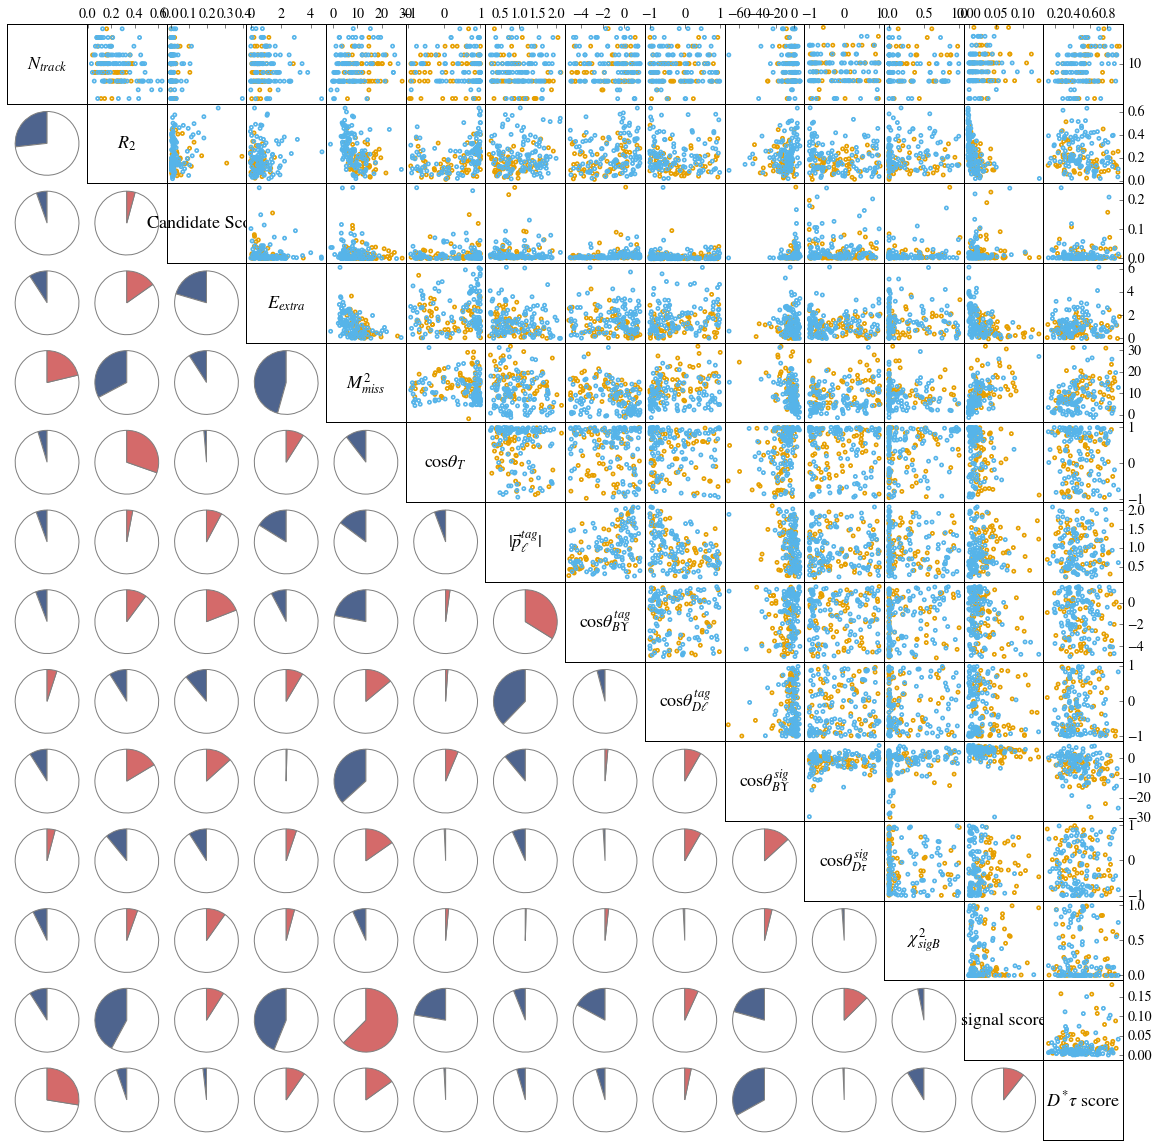

In [8]:
fig, ax = corrgramRec(X, Y='eventlabel', 
                      fields=corrgram_vars, alias=corrgram_varnames, 
                      figsize=(20,20),
                      marker_size=10,
                      diag_fontsize=18,
                      undersample=[0.003, 0.00009]);

if save_fig: fig.savefig('corrgram.pdf')